In [1]:
#Import Libraries

from pyspark.sql import SparkSession

# Create Spark Context
from pyspark.sql import functions as func # To use 'sum', 'count', and other functions
from pyspark.sql.types import IntegerType, DoubleType

### Pandas vs PySpark
The complexity of Data Processing Tasks: PySpark is more suitable for complex data processing tasks that involve multiple stages of data transformation and analysis. Pandas is more suitable for simple data analysis tasks that involve filtering, selecting, and aggregating data.

In [2]:
import pandas as pd # Python library to manage dataframes, similar as PySpark

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
bank_data = spark.read.option('header','true').options(delimiter=";").csv('bank.csv', inferSchema=True)
bank_data.show()
# NOTE:
# What is inferSchema=True???
# Infer schema will automatically guess the data types for each field. If we set this option to TRUE, the API will read some sample records from the file to infer the schema. If we want to set this value to false, we must specify a schema explicitly

+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

In [5]:
# Showing the type of each column

bank_data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [6]:
# Showing the first 5 rows of data

bank_data.head(5)

[Row(age=30, job='unemployed', marital='married', education='primary', default='no', balance=1787, housing='no', loan='no', contact='cellular', day=19, month='oct', duration=79, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'),
 Row(age=33, job='services', marital='married', education='secondary', default='no', balance=4789, housing='yes', loan='yes', contact='cellular', day=11, month='may', duration=220, campaign=1, pdays=339, previous=4, poutcome='failure', y='no'),
 Row(age=35, job='management', marital='single', education='tertiary', default='no', balance=1350, housing='yes', loan='no', contact='cellular', day=16, month='apr', duration=185, campaign=1, pdays=330, previous=1, poutcome='failure', y='no'),
 Row(age=30, job='management', marital='married', education='tertiary', default='no', balance=1476, housing='yes', loan='yes', contact='unknown', day=3, month='jun', duration=199, campaign=4, pdays=-1, previous=0, poutcome='unknown', y='no'),
 Row(age=59, job='blue-coll

## TASK 1

### Calculate the Mean, Median, and Standard Deviation of all the variables/attributes of numeric type:

**Getting a Database:** Once you have a connected aninstance of MngoClient, you can access any database managed by the specified MngoDB server. To define which database you want to use, you can use the dot notation.

### Method 1

### Using 'describe' function to provide the basic statisticsa

In [7]:
bank_data.select('age', 'balance', 'day', 'duration', 'pdays', 'previous').describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|           balance|               day|          duration|             pdays|          previous|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|              4521|              4521|              4521|              4521|              4521|              4521|
|   mean| 41.17009511170095|1422.6578190665782|15.915284229152842|263.96129174961294|39.766644547666445|0.5425790754257908|
| stddev|10.576210958711263|3009.6381424673395| 8.247667327229934|259.85663262468216|100.12112444301656|1.6935623506071211|
|    min|                19|             -3313|                 1|                 4|                -1|                 0|
|    max|                87|             71188|                31|              3025|               871|                25|
+-------

### Method 2

In [8]:
bank_data.select(func.stddev('age')).show()

+------------------+
|       stddev(age)|
+------------------+
|10.576210958711263|
+------------------+



In [9]:
bank_data.select(func.mean('age')).show()

+-----------------+
|         avg(age)|
+-----------------+
|41.17009511170095|
+-----------------+



In [10]:
bank_data.select(func.max('age')).show()

+--------+
|max(age)|
+--------+
|      87|
+--------+



In [11]:
bank_data.select(func.min('age')).show()

+--------+
|min(age)|
+--------+
|      19|
+--------+



In [12]:
#Mean of all columns
#bank_data.select([func.mean(c) for c in bank_data.columns]).first()
# Calculate the mean only for the numeric columns
# Get the list of all numeric columns
numeric_cols = [
    c for c, dtype in bank_data.dtypes 
    if dtype in ('int', 'integer', 'bigint', 'float', 'double', 'decimal')
]
# Calculate the mean only for the numeric columns
bank_data.select([func.mean(c) for c in numeric_cols]).first()

Row(avg(age)=41.17009511170095, avg(balance)=1422.6578190665782, avg(day)=15.915284229152842, avg(duration)=263.96129174961294, avg(campaign)=2.793629727936297, avg(pdays)=39.766644547666445, avg(previous)=0.5425790754257908)

### Task 2

### Create a bar graph of the variables/attribute: Previous

#### We can  use the built-in functionality of Pandas to draw a chart

### Notes

ascending = False means from highest to lowest

groupBy: It is used for grouping the data points (i.e. rows) based on the distinct values in the given column or columns. We can then calculate aggregated values for the generated groups.

orderBy: Sorting

In [13]:
# Create a new dataframe in which the rows are groups based on the distict values of 'job' column
df = bank_data.groupBy('job').sum().orderBy("sum(previous)", ascending=False)
df.head(10)

[Row(job='management', sum(age)=39284, sum(balance)=1712154, sum(day)=15751, sum(duration)=252460, sum(campaign)=2881, sum(pdays)=39698, sum(previous)=532),
 Row(job='blue-collar', sum(age)=37988, sum(balance)=1026563, sum(day)=14646, sum(duration)=263141, sum(campaign)=2693, sum(pdays)=39345, sum(previous)=467),
 Row(job='technician', sum(age)=30313, sum(balance)=1022205, sum(day)=12429, sum(duration)=193673, sum(campaign)=2098, sum(pdays)=30156, sum(previous)=443),
 Row(job='admin.', sum(age)=18968, sum(balance)=586380, sum(day)=7803, sum(duration)=112172, sum(campaign)=1258, sum(pdays)=23897, sum(previous)=308),
 Row(job='services', sum(age)=16084, sum(balance)=460350, sum(day)=6470, sum(duration)=109457, sum(campaign)=1177, sum(pdays)=15167, sum(previous)=185),
 Row(job='retired', sum(age)=14230, sum(balance)=533414, sum(day)=3578, sum(duration)=65701, sum(campaign)=567, sum(pdays)=8067, sum(previous)=136),
 Row(job='self-employed', sum(age)=7586, sum(balance)=254811, sum(day)=2961

#### Method 1: Using Pandas to graph

<Axes: xlabel='job'>

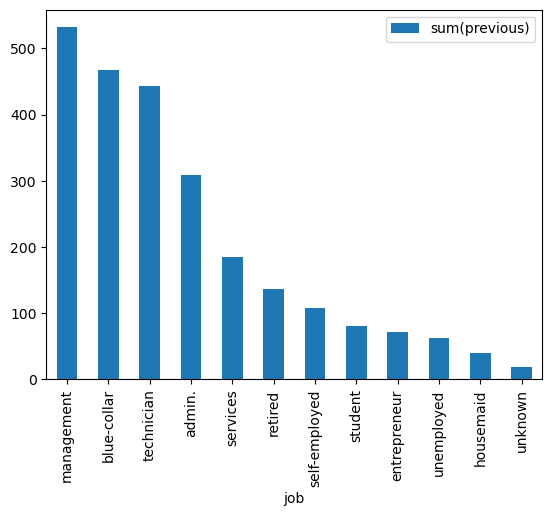

In [14]:
# Convert the PySpark dataframe to Pandas dataframe ( to be able to use the Pandas chart drawing functionality)

df.toPandas().plot.bar(x='job', y='sum(previous)')

#### Method 2: Using Matplotlib to graph

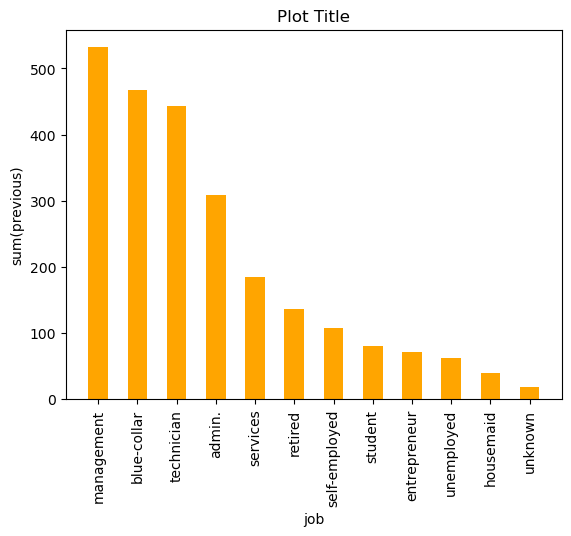

In [15]:
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

import matplotlib.pyplot as plt

# Create a bar chart using Matplotlib
df_pan = df.toPandas() #Convert the PySpark dataframe to Pandas dataframe

plt.bar(df_pan['job'], df_pan['sum(previous)'], width=0.5, color="orange")
 
# Set the chart title and labels
plt.title('Plot Title')
plt.xlabel('job')
plt.ylabel('sum(previous)')

plt.xticks(rotation = 90)

plt.show()

## Task 3

#### Create a Normalised bar graph of the variable/attribute: Previous

### Normalization

**Normalization:** The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

Add Normalised columns to the inout dataframe.

#### Using the min-max feature scaling

The min-max approach (often called **Normalization**) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the `.min()` and `.max()` methods.

$$
 \frac{x-min}{max-min}
$$

In [16]:
df_result = df.toPandas()
df_result["sum(previous)_norm"] = (df_result["sum(previous)"] - df_result["sum(previous)"].min()) / (df_result["sum(previous)"].max()-df_result["sum(previous)"].min())

In [17]:
df_result

,job,sum(age),sum(balance),sum(day),sum(duration),sum(campaign),sum(pdays),sum(previous),sum(previous)_norm
0,management,39284,1712154,15751,252460,2881,39698,532,1.000000
1,blue-collar,37988,1026563,14646,263141,2693,39345,467,0.873294
2,technician,30313,1022205,12429,193673,2098,30156,443,0.826511
3,admin.,18968,586380,7803,112172,1258,23897,308,0.563353
4,services,16084,460350,6470,109457,1177,15167,185,0.323587
5,retired,14230,533414,3578,65701,567,8067,136,0.228070
6,self-employed,7586,254811,2961,48335,600,5171,108,0.173489
7,student,2253,129681,1377,20890,201,3840,81,0.120858
8,entrepreneur,7058,276381,2563,47960,435,5422,72,0.103314
9,unemployed,5236,139446,2060,38562,343,4688,62,0.083821


<Axes: xlabel='job'>

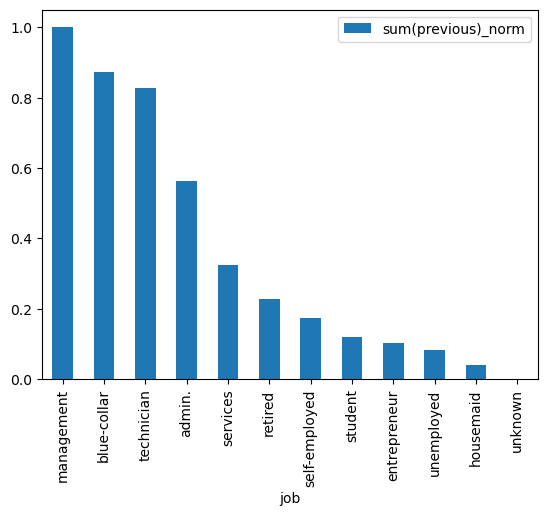

In [18]:
df_result.plot.bar(x='job', y='sum(previous)_norm')

### Standardization

The z-score method (often called **Standardization**) transforms the info into a distribution with mean of 0 and the standard deviation of 1. each standardized value is computed by subtracting the mean of the corresponding feature whn dividing by the sandard deviaiton.

$$
 \frac{x-mean}{stdev}
$$

In [19]:
df_result["sum(previous)_std"] = (df_result["sum(previous)"] - df_result["sum(previous)"].mean()) / (df_result["sum(previous)"].std())

In [20]:
df_result

,job,sum(age),sum(balance),sum(day),sum(duration),sum(campaign),sum(pdays),sum(previous),sum(previous)_norm,sum(previous)_std
0,management,39284,1712154,15751,252460,2881,39698,532,1.000000,1.779601
1,blue-collar,37988,1026563,14646,263141,2693,39345,467,0.873294,1.426488
2,technician,30313,1022205,12429,193673,2098,30156,443,0.826511,1.296108
3,admin.,18968,586380,7803,112172,1258,23897,308,0.563353,0.562718
4,services,16084,460350,6470,109457,1177,15167,185,0.323587,-0.105481
5,retired,14230,533414,3578,65701,567,8067,136,0.228070,-0.371675
6,self-employed,7586,254811,2961,48335,600,5171,108,0.173489,-0.523785
7,student,2253,129681,1377,20890,201,3840,81,0.120858,-0.670463
8,entrepreneur,7058,276381,2563,47960,435,5422,72,0.103314,-0.719356
9,unemployed,5236,139446,2060,38562,343,4688,62,0.083821,-0.773681


<Axes: xlabel='job'>

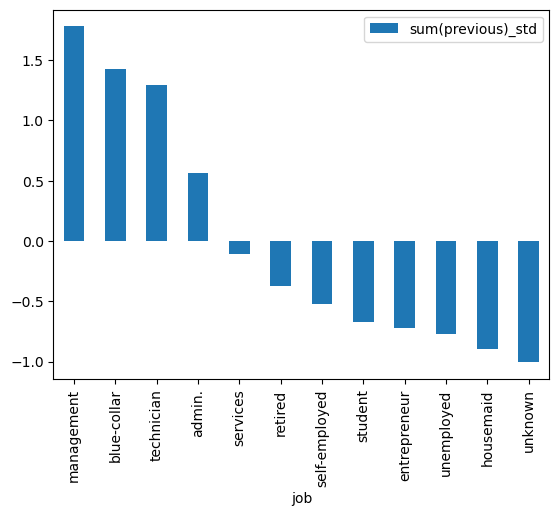

In [21]:
df_result.plot.bar(x='job', y='sum(previous)_std')

In [22]:
df_result["sum(previous)_std"].mean()

np.float64(5.551115123125783e-17)

In [23]:
df_result["sum(previous)_std"].std()

1.0

### Task 4

#### Create a histogram of the variable/attribute: age

array([[<Axes: title={'center': 'age'}>]], dtype=object)

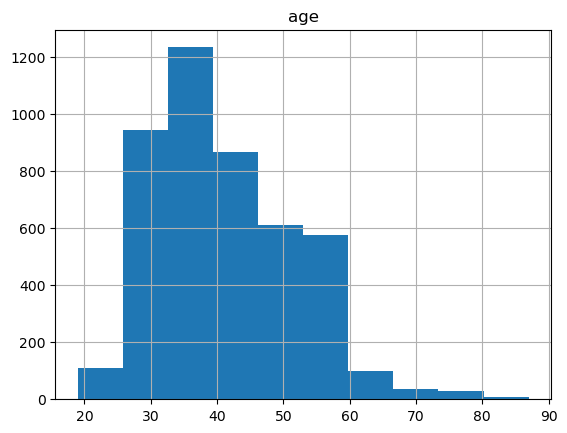

In [24]:
df = bank_data.select('age') # Selecting the column 'age'
df.toPandas().hist(column='age') # Converting the dataframe to Pandas and then draw a histogram

### Task 5

#### Create a histogram of the normalised variable/attribute: age

In [25]:
df_result = df.toPandas()
df_result["age_norm"] = (df_result["age"] - df_result["age"].min()) / (df_result["age"].max()-df_result["age"].min())
df_result

,age,age_norm
0,30,0.161765
1,33,0.205882
2,35,0.235294
3,30,0.161765
4,59,0.588235
...,...,...
4516,33,0.205882
4517,57,0.558824
4518,57,0.558824
4519,28,0.132353


array([[<Axes: title={'center': 'age_norm'}>]], dtype=object)

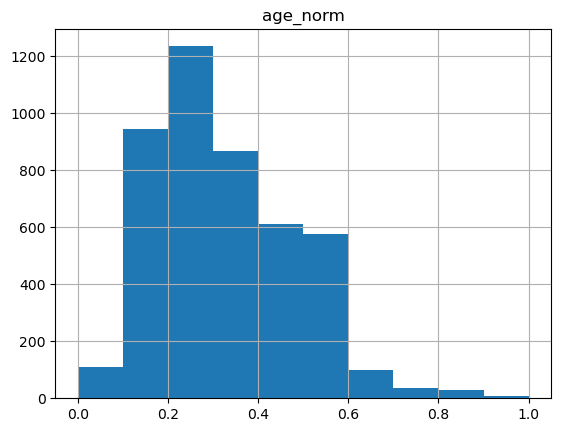

In [26]:
df_result.hist(column='age_norm')

### Task 6`

#### Bin (groupby) the variable/attribute age and create a bar chart

<Axes: xlabel='job'>

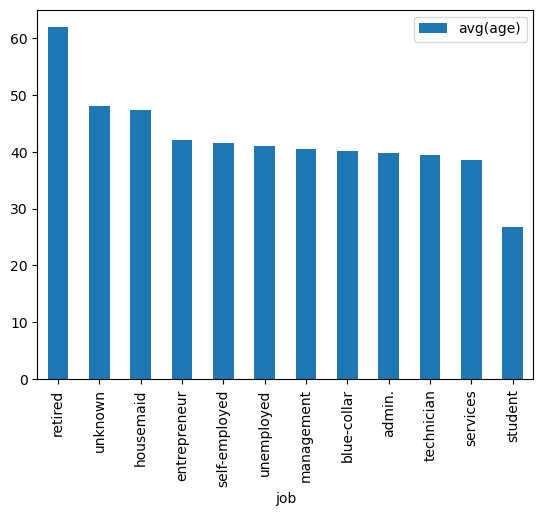

In [27]:
df=bank_data.groupBy('job').agg(func.mean('age')).orderBy('avg(age)', ascending=False)
df.toPandas().plot.bar(x='job', y='avg(age)')

### Task 7

#### Create a scatter plot for the following variable/attribute: age and balance

<Axes: xlabel='age', ylabel='balance'>

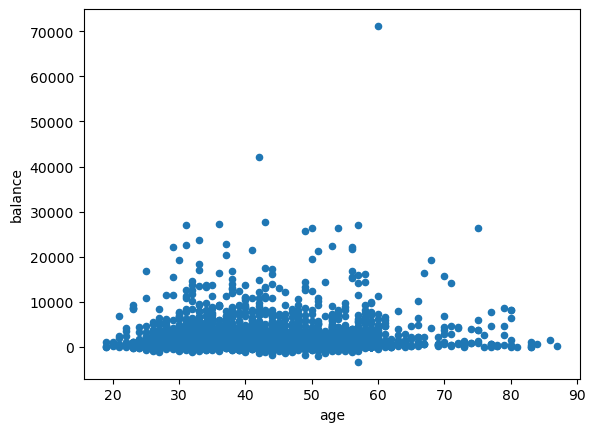

In [28]:
df = bank_data.select('age', 'balance')
df.toPandas().plot.scatter(x='age', y='balance')

## Cleaning Data

Consider a scenario in which the owner of the data set decides that any data under the ‘Job’ column that contains ‘unknown’ or ‘unemployed’ data should be considered inaccurate. Thus, those data should be removed from the dataset before data exploration.

As part of this data removal operation (i.e., the data cleaning operation), you are requested to get rid of all the data rows in which the ‘Job’ column contains ‘unknown’ or ‘unemployed’ instead of data. You can remove these either using PySpark or Excel. Once these data have been removed, save the remaining data in a csv file named bank.csv as before.

#### Filtering

In [29]:
# Using 'where' to filter the data
bank_data.where(bank_data.job=='unemployed').show() 

+---+----------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed| married|  primary|     no|   1787|     no|  no| cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 40|unemployed| married|secondary|     no|    219|    yes|  no| cellular| 17|  nov|     204|       2|  196|       1| failure| no|
| 31|unemployed|  single|  primary|     no|    406|     no|  no| cellular|  4|  feb|     736|       1|   -1|       0| unknown|yes|
| 56|unemployed| married|  primary|     no|   3391|     no|  no| cellular| 21|  apr|     243|       1|   -1|       0| unknown|yes|
| 24|unemployed|  single|secondary|     no|    119|     no|  no|  unknown| 15|  sep

In [30]:
# Using 'and' (&) 'or' (|) to apply multiple conditions 
bank_data.where((bank_data.job=='unknown') | (bank_data.job=='unemployed')).show() 

+---+----------+--------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job| marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+--------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed| married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 40|unemployed| married|secondary|     no|    219|    yes|  no|cellular| 17|  nov|     204|       2|  196|       1| failure| no|
| 41|   unknown|  single| tertiary|     no|   1567|     no|  no|cellular|  1|  jul|     291|       2|   -1|       0| unknown| no|
| 31|unemployed|  single|  primary|     no|    406|     no|  no|cellular|  4|  feb|     736|       1|   -1|       0| unknown|yes|
| 56|unemployed| married|  primary|     no|   3391|     no|  no|cellular| 21|  apr|     24

In [31]:
bank_data.count()

4521

In [32]:
bank_data.where((bank_data.job=='unknown') | (bank_data.job=='unemployed')).count()

166

#### Removing the unwanted rows

In [33]:
df_cleaned = bank_data.where((bank_data.job!='unknown') & (bank_data.job!='unemployed'))

In [34]:
df_cleaned.count()

4355

### Finding Duplicated Rows

In [35]:
df = bank_data.toPandas()
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


#### Writing the cleaned dataframe to a csv file

In [36]:
df_cleaned.toPandas().to_csv("bank_data_cleaned.csv", index=False)
print("SUCCESS! Check your C: drive for bank_data_cleaned.csv")

SUCCESS! Check your C: drive for bank_data_cleaned.csv
